In [84]:
import numpy as np 

debug = True
def reshape_image_for_neural_network_input(image, IMAGE_SIZE=224):
    print ("flatten the image")
    image = np.reshape(image,[IMAGE_SIZE* IMAGE_SIZE*3,1])
    print ("image.shape", image.shape)
    print ("reshape the image to be similar to the input feature vector")
    #image = np.reshape(image,[1,IMAGE_SIZE, IMAGE_SIZE,3]).astype('float')
    image = image.reshape(1,IMAGE_SIZE,IMAGE_SIZE,3).astype('float')
    print ("image.shape", image.shape)
    return image


from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np


def processImage(img_path):
    img = image.load_img(img_path,color_mode='grayscale', target_size=(224, 224))
    if(debug):
        display(img)
    x = image.img_to_array(img)
    return x

# BATCH IMAGE PREPORCESSING

Create Dataset into 2 files Data (X) and target/labels (y)

REF : https://towardsdatascience.com/how-to-use-a-pre-trained-model-vgg-for-image-classification-8dd7c4a4a517

In [85]:
import glob
  
inputPath = 'IMAGE_TO_PROCESS/'  
# Returns a list of names in list files.
print("Using glob.glob()")
files = glob.glob(inputPath+'/**/*.png', 
                   recursive = True)

print("PNG Files Found ",len(files))

Using glob.glob()
PNG Files Found  12


IMAGE_TO_PROCESS\ABNORMAL\20180327682655-26-MXX.png


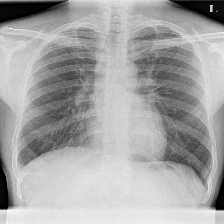

(224, 224, 1)
(1, 224, 224, 1)  Label :  [1]
(1,)
IMAGE_TO_PROCESS\ABNORMAL\20180504870800-30-M.png


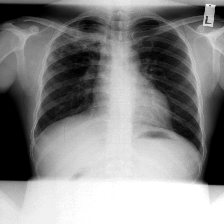

(224, 224, 1)
(2, 224, 224, 1)  Label :  [1]
(2, 1)
IMAGE_TO_PROCESS\ABNORMAL\20180504870800-30-MXX.png


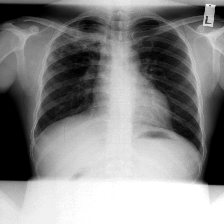

(224, 224, 1)
(3, 224, 224, 1)  Label :  [1]
(3, 1)
IMAGE_TO_PROCESS\ABNORMAL\20181008580405-41-M.png


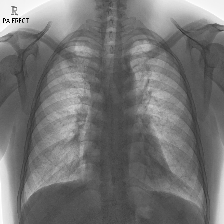

(224, 224, 1)
(4, 224, 224, 1)  Label :  [1]
(4, 1)
IMAGE_TO_PROCESS\ABNORMAL\20190704637041-37-M.png


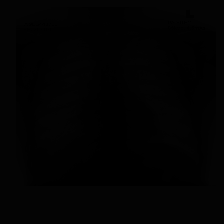

(224, 224, 1)
(5, 224, 224, 1)  Label :  [1]
(5, 1)
IMAGE_TO_PROCESS\ABNORMAL\20190704637041-37-MXX.png


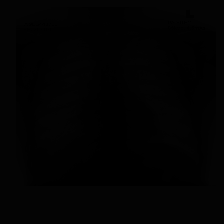

(224, 224, 1)
(6, 224, 224, 1)  Label :  [1]
(6, 1)
IMAGE_TO_PROCESS\NORMAL\20180327682655-26-MXX.png


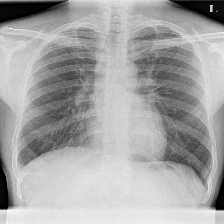

(224, 224, 1)
(7, 224, 224, 1)  Label :  [0]
(7, 1)
IMAGE_TO_PROCESS\NORMAL\20180504870800-30-M.png


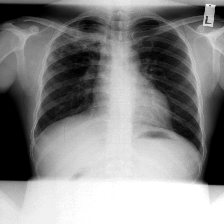

(224, 224, 1)
(8, 224, 224, 1)  Label :  [0]
(8, 1)
IMAGE_TO_PROCESS\NORMAL\20180504870800-30-MXX.png


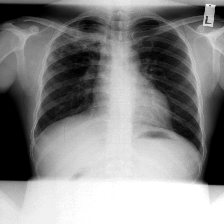

(224, 224, 1)
(9, 224, 224, 1)  Label :  [0]
(9, 1)
IMAGE_TO_PROCESS\NORMAL\20181008580405-41-M.png


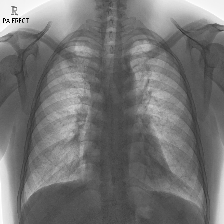

(224, 224, 1)
(10, 224, 224, 1)  Label :  [0]
(10, 1)
IMAGE_TO_PROCESS\NORMAL\20190704637041-37-M.png


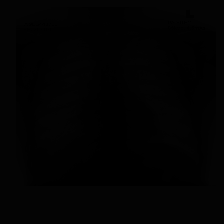

(224, 224, 1)
(11, 224, 224, 1)  Label :  [0]
(11, 1)
IMAGE_TO_PROCESS\NORMAL\20190704637041-37-MXX.png


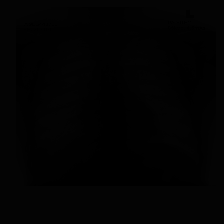

(224, 224, 1)
(12, 224, 224, 1)  Label :  [0]
(12, 1)


In [86]:
dataStack = []
first = True
for file in files:
    print(file)
    
    fetures = processImage(file)
    print(fetures.shape)
    new =  np.array([fetures])
    
    if(file.__contains__("ABNORMAL") == 1):
        label = np.array([1])
    else:
        label = np.array([0])
        
    if(first):
        dataStack = new
        labelStack = label
        first = False
    else:
        dataStack = np.vstack((new,dataStack))
        labelStack = np.vstack((label,labelStack))
    print(dataStack.shape , " Label : ",label )
    print(labelStack.shape)

In [90]:
from datetime import datetime
import calendar
import os

d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())
os.mkdir("Extraction-"+str(unixtime))
path = "Extraction-"+str(unixtime)+"/"
datafileName = path+'dataset_Total-'+str(dataStack.shape[0])+'.npy'
labelfileName = path+'label_Total-'+str(dataStack.shape[0])+'.npy'
print("Saving Data to : ", datafileName)
print("Saving Label to : ", labelfileName)
np.save(datafileName, dataStack)    # .npy extension is added if not given
np.save(labelfileName, labelStack)    # .npy extension is added if not given
## np.load('test3.npy') for loading back data

Saving Data to :  Extraction-1616738986/dataset_Total-12.npy
Saving Label to :  Extraction-1616738986/label_Total-12.npy
